![astropy logo](http://astropy.readthedocs.org/en/stable/_images/astropy_banner.svg)

# Introduction to [`astropy`](http://astropy.readthedocs.org/en/stable/)

with [Brett Morris](http://staff.washington.edu/bmmorris/)

**Dependencies**: astropy, astroquery, astroplan

### Outline
1. `astropy.units`
2. `astropy.time`
3. `astropy.coordinates`
4. `astropy.cosmology`
5. `astropy.table`
5. `astropy`-affiliated packages: `astroquery` & `astroplan`
6. `astropy.io.fits`
7. `astropy.io.ascii`
8. Exercises

*** 
 
## 1) [`astropy.units`](http://astropy.readthedocs.org/en/latest/units/): Problem sets are about to get easier

One of the modules most central to `astropy` is the `units` module, which will save you lots of time. 

In [1]:
import astropy.units as u
import numpy as np

height = u.Quantity(1.778, unit=u.meter)
# or equivalently:
height = 1.778*u.m

height

<Quantity 1.778 m>

If you're self-abusive, imperial units are supported:

In [2]:
from astropy.units.imperial import foot
height.to(foot)

<Quantity 5.833333333333333 ft>

What is the light-travel time across one Brett? ($\Delta t = \Delta x / c$)

In [102]:
from astropy.constants import c

dt = height/c
dt

<Quantity 5.930769612623144e-09 s>

Metric prefixes accepted (try `M` for mega, `p` for pico, etc.)

In [103]:
dt.to(u.ns)

<Quantity 5.930769612623143 ns>

A quantity has two attributes: 

In [104]:
dt.value, dt.unit

(5.930769612623144e-09, Unit("s"))

Vector quantities are where it's at: 

In [110]:
distances = u.Quantity([1.3, 1.5, 1.7], unit=u.lightyear)

distances.to(u.m)

<Quantity [  1.22989496e+16,  1.41910957e+16,  1.60832418e+16] m>

Quantities are either Python built-in types (float, int) or numpy arrays with metadata. To get at the underlying numbers, use the `value` attribute: 

In [112]:
distances.value, type(distances.value)

(array([ 1.3,  1.5,  1.7]), numpy.ndarray)

If the result of what you're computing is unitless, but you arrived there by combining lots of units, then you might need to use the `float` function to turn your unitful answer into a dimensionless quantity by resolving all of the unit equivalences: 

In [118]:
expansion_rate = 67 * u.km / u.s / u.Mpc
duration = 1 * u.Gyr

expansion_rate * duration

<Quantity 67.0 Gyr km / (Mpc s)>

In [119]:
float(expansion_rate * duration)

0.0685217150585984

There are a bunch of useful quantities stored in `astropy.constants`, which will save you frustration in problem sets: 

In [127]:
from astropy.constants import R_sun, R_earth, R_jup
from astropy.constants import M_sun, M_earth, m_e
from astropy.constants import G, h, k_B

print(M_sun)

  Name   = Solar mass
  Value  = 1.9891e+30
  Uncertainty  = 5e+25
  Unit  = kg
  Reference = Allen's Astrophysical Quantities 4th Ed.


You can use these constants like units:

In [140]:
# Calculate the black hole mass in units of solar masses: 
black_hole_mass = 12e31 * u.kg

black_hole_mass.to(M_sun)

<Quantity 60.328791915941885 1.9891e+30 kg>

The above result should be read as "60 (solar masses)". To see the quantity without it's unit, use `value`: 

In [141]:
black_hole_mass.to(M_sun).value

60.328791915941885

***

## 2) [`astropy.time`](http://astropy.readthedocs.org/en/latest/time/index.html): Time objects for humans

There are many distinct and confusing time systems used in astronomy, and the `astropy.time` module provides a convenient means of translating between them – never code your own JD-to-ISO time converter or try to remember whether or not the difference between JD and MJD has a 0.5 in it again!

In [5]:
# The astropy.time.Time object contains a time in a specified format
from astropy.time import Time

# If the input format is not specified, it will guess. Here's an ISO formatted string:
Time('2005-01-01 12:34:56')

<Time object: scale='utc' format='iso' value=2005-01-01 12:34:56.000>

Here's a Julian Date:

In [6]:
t = Time(2453372.0242592595, format='jd')
t

<Time object: scale='utc' format='jd' value=2453372.0242592595>

Convert between time formats by calling `t.iso`, `t.mjd`, etc.

In [7]:
t.iso

'2005-01-01 12:34:56.000'

By default, the scale (or time standard) is set to **UTC**, which is defined to keep an integer number of seconds per day. There are other time standards like **UT1** which are defined by the rotation of the Earth (see [my blog post on time standards](http://bmmorris.blogspot.com/2015/06/ut1-utc-and-astropy.html) for more background). Converting between the two can be messy, but not with astropy:

In [8]:
print('Available time scales: {0}'.format(', '.join(Time.SCALES)))
t.scale

Available time scales: tai, tcb, tcg, tdb, tt, ut1, utc


'utc'

In [9]:
t.ut1

<Time object: scale='ut1' format='jd' value=2453372.0242534266>

If converting between UTC and UT1 you raises an `IndexError` like this, 
```
IndexError: (some) times are outside of range covered by IERS table.
```
it's because you need more up-to-date Earth rotation data since the Earth's rate of rotation is constantly changing. See the `astropy.time` docs on [Transformation offsets](http://astropy.readthedocs.org/en/stable/time/index.html#transformation-offsets) to update your Earth rotation data.

In [10]:
t.ut1.iso

'2005-01-01 12:34:55.496'

Lastly, arrays of times can be generated from numpy arrays:

In [11]:
Time.now() + np.linspace(0, 1, 10)*u.year

<Time object: scale='utc' format='datetime' value=[datetime.datetime(2016, 8, 24, 23, 5, 14, 772001)
 datetime.datetime(2016, 10, 4, 13, 5, 14, 772001)
 datetime.datetime(2016, 11, 14, 3, 5, 14, 772001)
 datetime.datetime(2016, 12, 24, 17, 5, 14, 772001)
 datetime.datetime(2017, 2, 3, 7, 5, 14, 772001)
 datetime.datetime(2017, 3, 15, 21, 5, 14, 772001)
 datetime.datetime(2017, 4, 25, 11, 5, 14, 772001)
 datetime.datetime(2017, 6, 5, 1, 5, 14, 772001)
 datetime.datetime(2017, 7, 15, 15, 5, 14, 772001)
 datetime.datetime(2017, 8, 25, 5, 5, 14, 772001)]>

`Time` objects are also great for plotting a time series. For exampel, try using the `plot_date` attribute with `plt.plot_date`, or `decimalyear` with `plt.plot`: 

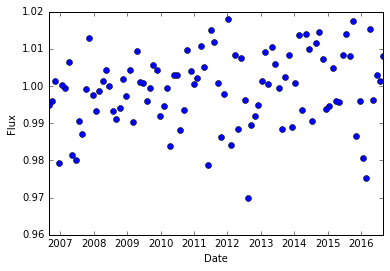

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt

times = Time.now() - np.linspace(0, 10, 100) * u.year
fluxes = 0.01 * np.random.randn(len(times)) + 1

plt.plot_date(times.plot_date, fluxes)
plt.xlabel('Date')
plt.ylabel('Flux')
plt.show()

***


## 3) [`astropy.coordinates`](http://astropy.readthedocs.org/en/latest/coordinates/index.html)

![XKCD comic](http://imgs.xkcd.com/comics/standards.png)

Convert the position of your target from one coordinate system to another without opening a reference book!

Let's define the galactic center in the natural coordinate system:

In [12]:
from astropy.coordinates import SkyCoord

gal_center = SkyCoord(l=0*u.deg, b=0*u.deg, frame='galactic')
print(gal_center)

<SkyCoord (Galactic): (l, b) in deg
    (0.0, 0.0)>


Now let's say you have to tell an observer where that is in ICRS coordinates: what is that position in RA/Dec?

In [13]:
gal_center.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (266.40498829, -28.93617776)>

You can resolve targets by name with the `from_name` class method

In [14]:
sgr_a = SkyCoord.from_name('Sgr A*')
print(sgr_a)

<SkyCoord (ICRS): (ra, dec) in deg
    (266.41681663, -29.00782497)>


Let's represent these coordinates in various formats with `.degree`, `.hourangle`:

In [15]:
sgr_a.ra.degree

266.416816625

and experiment with the string outputs you'd use in a proposal, like `dms`, `hmsdms`, `decimal`:

In [16]:
sgr_a.to_string(style='hmsdms', sep=':')

'17:45:40.036 -29:00:28.1699'

With a specified location on Earth, you can compute alt/az coordinates for any `SkyCoord`

In [17]:
from astropy.coordinates import EarthLocation, AltAz

# Define Earth location:
longitude, latitude, elevation = (-122.3331*u.deg, 47.6097*u.deg, 0*u.m)
seattle = EarthLocation.from_geodetic(longitude, latitude, elevation)

# Define alt/az frame:
alt_az_frame = AltAz(obstime=Time('2005-06-07 08:09:10'), location=seattle)

# Transform the coordinate to the new reference frame, and print
sgr_a_altaz = sgr_a.transform_to(alt_az_frame)
sgr_a_altaz.to_string(style='hmsdms')

'11h21m34.3211s +12d46m20.633s'

***


## 4) [`astropy.cosmology`](http://astropy.readthedocs.org/en/latest/cosmology/): No more JavaScript cosmology calculators for you!

First, choose a cosmology (e.g.: `Planck13`, `WMAP9`) and get $H_0$:

In [18]:
from astropy.cosmology import Planck13 as cosmo

cosmo.H(z=0)

<Quantity 67.77 km / (Mpc s)>

In [19]:
cosmo.angular_diameter_distance(z=1)

<Quantity 1697.5793543185223 Mpc>

In [20]:
cosmo.luminosity_distance(z=1)

<Quantity 6790.317417274089 Mpc>

In cosmology class you'll still have to learn to solve these from scratch, but you can double check yourself like so: 

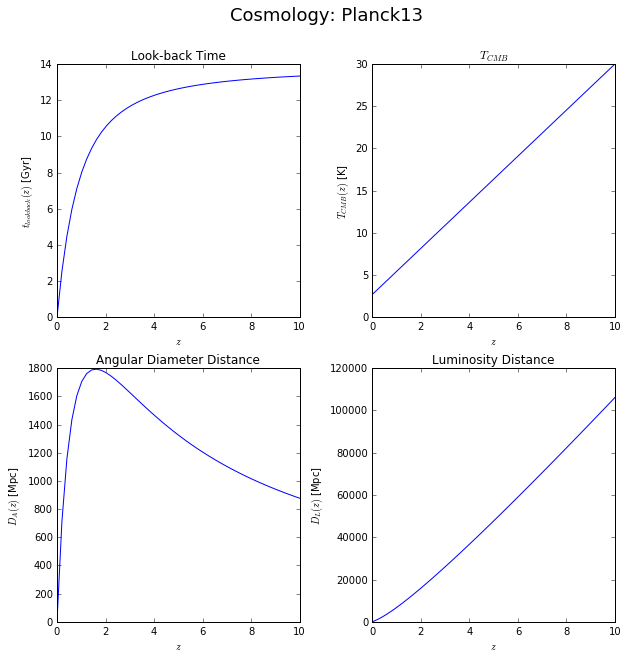

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

z = np.linspace(0, 10, 50)

# Compute some parameters
t_lookback = cosmo.lookback_time(z)
T_cmb = cosmo.Tcmb(z)
D_A = cosmo.angular_diameter_distance(z)
D_L = cosmo.luminosity_distance(z)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].plot(z, t_lookback)
ax[0, 0].set(title='Look-back Time', xlabel='$z$', 
             ylabel=r'$t_{{lookback}}(z)$ [{0}]'.format(t_lookback.unit))

ax[0, 1].plot(z, T_cmb)
ax[0, 1].set(title='$T_{CMB}$', xlabel='$z$', 
             ylabel='$T_{{CMB}}(z)$ [{0}]'.format(T_cmb.unit))

ax[1, 0].plot(z, D_A)
ax[1, 0].set(title='Angular Diameter Distance', xlabel='$z$', 
             ylabel=r'$D_A(z)$ [{0}]'.format(D_A.unit))

ax[1, 1].plot(z, D_L)
ax[1, 1].set(title='Luminosity Distance', xlabel='$z$', 
             ylabel=r'$D_L(z)$ [{0}]'.format(D_L.unit))

fig.subplots_adjust(wspace=0.3)
fig.suptitle('Cosmology: {0}'.format(cosmo.name), fontsize=18);

# 5) `astropy.table`: Table objects for physical scientists

What makes a table object specific to physical scientists, you ask? **Units** my friend, units. In general, [pandas](http://pandas.pydata.org) has the most mature table-like data structures in Python, but the astropy table is nifty, so let's see how it works. 

A table can be constructed a bunch of ways. Let's initialize one from an array: 

In [77]:
from astropy.table import Table

example_data = np.random.randint(0, 100, 50).reshape((10, 5))
column_names = ['a', 'b', 'c', 'd', 'e']

table = Table(example_data, names=column_names)

table

a,b,c,d,e
int64,int64,int64,int64,int64
4,60,6,28,18
60,81,79,2,66
29,72,65,60,88
84,60,58,12,63
21,82,46,19,94
47,45,40,85,20
76,71,66,99,65
91,80,2,50,12
54,5,97,67,20


As you can see, the astropy table has some special powers inside iPython notebooks, and gets rendered nicely. 

The first row tells you the names of each column. You can access a column of data from a table by treating the table like a dictionary: 

In [78]:
table['a']

4
60
29
84
21
47
76
91
54
68


This column object has a `.data` attribute which you can use to get at the `numpy` array underneath:

In [85]:
table['a'].data

array([ 4, 60, 29, 84, 21, 47, 76, 91, 54, 68])

This gets at the heart of what an astropy table is. It's essentially an ordered dictionary of columns. Each column is a numpy array _with metadata_. That metadata is what makes the table useful, because those columns, for example, can have units! 

In [86]:
table['a'].unit = u.km
table['b'].unit = u.lightyear
table['c'].unit = u.kg
table['d'].unit = u.s
table['e'].unit = u.Mpc

table

a,b,c,d,e
km,lyr,kg,s,Mpc
int64,int64,int64,int64,int64
4,60,6,28,18
60,81,79,2,66
29,72,65,60,88
84,60,58,12,63
21,82,46,19,94
47,45,40,85,20
76,71,66,99,65
91,80,2,50,12


Now you can do operations on each column as though it was a unit vector:

In [144]:
table['b'].to(u.pc)

<Quantity [ 18.39608363, 24.8347129 , 22.07530035, 18.39608363,
            25.14131429, 13.79706272, 21.76869896, 24.5281115 ,
             1.53300697,  7.66503484] pc>

and you can get each element as a quantity, or not: 

In [94]:
# Not a quantity:
table['a'][2], type(table['a'][2])

(29, numpy.int64)

In [96]:
# A quantity:
table['a'].quantity[2]

<Quantity 29 km>

***


## 6a) Affiliated Package: [`astroquery`](http://astroquery.readthedocs.org)

Since `astropy` is a collection of fundamental tools that are easy to use, lots of packages have been built on top of `astropy`, but not necessarily merged into `astropy` core. One of those is `astroquery`, which allows you to query astronomical databases with ease.

Let's query for the SIMBAD entry for a planet hosting star, HD 189733:

In [153]:
from astroquery.simbad import Simbad

Simbad.query_object('HD 189733')

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
HD 189733,20 00 43.7134,+22 42 39.064,9,9,4.660,3.520,90,A,O,2007A&A...474..653V


Let's query Vizier for the famous list of standard stars from [Landolt (1992)](http://adsabs.harvard.edu/abs/1992AJ....104..340L). The [`astropy.table`](http://astropy.readthedocs.org/en/latest/table/) that is returned to you will have the same information as [this Vizier query page](http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=II/183A/table2).

In [23]:
from astroquery.vizier import Vizier

landolt_table = Vizier.get_catalogs('Landolt 1992')[0]
landolt_table

_RAJ2000,_DEJ2000,Star,RAJ2000,DEJ2000,o_Vmag,Vmag,e_Vmag,B-V,e_B-V,U-B,e_U-B,V-R,e_V-R,R-I,e_R-I,V-I,e_V-I,Nd,SimbadName
deg,deg,,"""h:m:s""","""d:m:s""",,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,
float64,float64,bytes11,bytes8,bytes9,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bytes18
7.5375,-46.5228,TPHE A,00 30 09,-46 31 22,29,14.651,0.0028,0.793,0.0046,0.380,0.0071,0.435,0.0019,0.405,0.0035,0.841,0.0032,12,[L92b] TPHE A
7.5667,-46.4653,TPHE B,00 30 16,-46 27 55,29,12.334,0.0115,0.405,0.0026,0.156,0.0039,0.262,0.0020,0.271,0.0019,0.535,0.0035,17,[L92b] TPHE B
7.5708,-46.5428,TPHE C,00 30 17,-46 32 34,39,14.376,0.0022,-0.298,0.0024,-1.217,0.0043,-0.148,0.0038,-0.211,0.0133,-0.360,0.0149,23,[L92b] TPHE C
7.5750,-46.5197,TPHE D,00 30 18,-46 31 11,37,13.118,0.0033,1.551,0.0030,1.871,0.0118,0.849,0.0015,0.810,0.0023,1.663,0.0030,23,[L92b] TPHE D
7.5792,-46.4100,TPHE E,00 30 19,-46 24 36,34,11.630,0.0017,0.443,0.0012,-0.103,0.0024,0.276,0.0007,0.283,0.0015,0.564,0.0019,8,[L92b] TPHE E
7.7083,-46.5592,TPHE F,00 30 50,-46 33 33,5,12.474,0.0004,0.855,0.0058,0.532,0.0161,0.492,0.0004,0.435,0.0040,0.926,0.0036,3,[L92b] TPHE F
7.7708,-46.3786,TPHE G,00 31 05,-46 22 43,5,10.442,0.0004,1.546,0.0013,1.915,0.0036,0.934,0.0004,1.085,0.0009,2.025,0.0009,3,[L92b] TPHE G
7.9583,2.6406,PG0029+024,00 31 50,+02 38 26,5,15.268,0.0094,0.362,0.0174,-0.184,0.0112,0.251,0.0161,0.337,0.0125,0.593,0.0067,2,PG0029+024


## 6b) Affiliated Package: [`astroplan`](https://astroplan.readthedocs.org/en/latest/)

`astroplan` is an `astropy`-affiliated package that helps you calculate when objects are observable. Here's a quick example for determining which targets are visible right now from Apache Point Observatory:

In [24]:
from astroplan import Observer, FixedTarget

# Targets are stored as `astroplan.FixedTarget` objects
target_names = ['Polaris', 'Sirius', 'Vega', 'Rigel']
targets = [FixedTarget.from_name(target) for target in target_names]

# Observatories are `astroplan.Observer` objects
observatory = Observer.at_site("Apache Point")

# Which targets are visible right now?
observatory.target_is_up(Time.now(), targets)

[True, False, True, False]

Now let's see which of those targets are visible over a time range of the next ten days, given the following constraints: 

* Observations must occur between civil twilights
* The altitude of the target must be $20^\circ < $alt$ < 85^\circ$

In [25]:
from astroplan import AtNightConstraint, AltitudeConstraint, observability_table

time_range = Time.now() + np.array([0, 10])*u.day
constraints = [AtNightConstraint.twilight_civil(),
               AltitudeConstraint(min=20*u.deg, max=85*u.deg)]

observability_table(constraints, observatory, targets, time_range=time_range)

target name,ever observable,always observable,fraction of time observable
str7,bool,bool,float64
Polaris,True,False,0.4375
Sirius,True,False,0.025
Vega,True,False,0.302083333333
Rigel,True,False,0.108333333333


Let's track that target's motion through the sky for the next ten hours in a plot: 

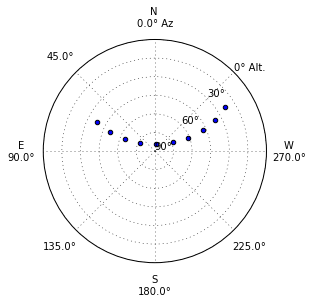

In [26]:
from astroplan.plots import plot_sky

# Plot at times: 
plot_times = Time.now() + np.linspace(0, 10, 10)*u.hour

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plot_sky(targets[2], observatory, plot_times)

For a more detailed run through of astroplan, [here's another notebook to check out](https://gist.github.com/bmorris3/19374760eb11271850ec).


# 7) `astropy.io.fits`: Reading and writing FITS files

Astronomers (unfortunately) use FITS files a lot, so let's practice using FITS files with astropy. The following command will download a FITS image for us to work with:

In [27]:
from astropy.utils.data import download_file
url = 'http://staff.washington.edu/bmmorris/images/example.fits'
example_fits_path = download_file(url)

We can read in FITS files in two ways. The first is generic, and allows us to see the different extensions. 

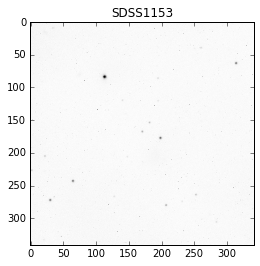

In [50]:
from astropy.io import fits

hdus = fits.open(example_fits_path)

print(hdus)

first_hdu = hdus[0]

plt.imshow(np.log(first_hdu.data), cmap=plt.cm.binary)
plt.title(first_hdu.header['OBJECT'])
plt.show()

Alternatively, if you know what HDU you want to access, and you want just the header or the data, you can use the following: 

In [38]:
image = fits.getdata(example_fits_path)
header = fits.getheader(example_fits_path)

You can access particular header cards from the `astropy.io.fits.header.Header` object like a dictionary: 

In [47]:
date_obs = header['DATE-OBS']
exp_time = header['EXPTIME']

print("Observation time: {0}".format(date_obs))
print("Exposure duration: {0} s".format(exp_time))

Observation time: 2016-03-29T02:48:57
Exposure duration: 120.0 s


To see the available keywords within the header, do:

In [54]:
list(header.keys())[:10]

['SIMPLE',
 'BITPIX',
 'NAXIS',
 'NAXIS1',
 'NAXIS2',
 'BSCALE',
 'BZERO',
 'DATE-OBS',
 'EXPTIME',
 'EXPOSURE']

If you want to write some results to a FITS file, you can do so like this: 

In [58]:
# Create a 2D, 10 x 10 random number array: 
example_data = np.random.randn(100).reshape((10, 10)) 

fits.writeto('example_data.fits', example_data, header=header, clobber=True)

***
# 8) Reading and writing ascii text tables

Perhaps a collaborator will send you some IDL-generated text tables to work with, and you'll want to open it with Python. Sometimes the easiest way to do this will be with `astropy.io.ascii`. Let's create an example table in the cell below: 

In [59]:
%%writefile example_table.txt
a  b  c
0  2  2
3  4  6
34 4  1
6  36 5
86 7  3

Writing example_table.txt


In [63]:
from astropy.io import ascii

table = ascii.read('example_table.txt')

table

a,b,c
int64,int64,int64
0,2,2
3,4,6
34,4,1
6,36,5
86,7,3


Well that was easy! We didn't have to specify anything, and it did most of the work. We can now take this `astropy.table.Table` object and make it even more useful, by giving the columns units, etc.:

In [66]:
table['a'].unit = u.kg

table

a,b,c
kg,,
int64,int64,int64
0,2,2
3,4,6
34,4,1
6,36,5
86,7,3


We can write this table out using the [very very flexible `ascii.write` function](http://docs.astropy.org/en/v0.2.1/io/ascii/index.html): 

In [69]:
# Directly output a table in LaTeX format: 
ascii.write(table, 'latex_table.tex', Writer=ascii.Latex)

# Output a CSV file: 
ascii.write(table, 'csv_table.csv', format='csv')

# Write a table with the column names at the top, in a comment
ascii.write(table, 'table_with_header.txt', Writer=ascii.CommentedHeader)

***

# Exercises

**1)** Get the light travel time to the sun in minutes, given it's distance *right now* (hint: check out [`astropy.coordinates.get_sun`](http://astropy.readthedocs.org/en/latest/api/astropy.coordinates.get_sun.html?highlight=get_sun#astropy.coordinates.get_sun)).

In [155]:
from astropy.coordinates import get_sun

d = get_sun(Time.now()).distance
delta_t = d/c
delta_t.to(u.min)

<Quantity 8.40116020717889 min>

**2)** Using your current distance from the Sun in #1, calculate which is greater: the force of gravity between you and the Sun right now, or between you and a bowling ball-sized chunk of neutron star placed 12 kilometers away. 

Let's assume your mass is 60 kg. Use `astropy.constants` to get the gravitational constant $G$ and the mass of the sun $M_\odot$. Let's say bowling balls have $r \sim 22$ cm, and neutron stars have a density of $\rho \sim  3.7 \times 10^{17} $kg m$^{-3}$.

In [156]:
from astropy.constants import G, M_sun, M_earth

# Force of gravity from the Sun
m1 = 60*u.kg
F_sun = G * m1 * M_sun / d**2

# Calculate mass of neutron star ball
rho = 3.7e17 * u.kg/u.m**3
r_bowlingball = 22 * u.cm
volume = 4./3 * np.pi * r_bowlingball**3
m_bowlingball = rho * volume

# Force of gravity from the neutron star ball
d_bowlingball = 12*u.km

F_bowlingball = G * m1 * m_bowlingball / d_bowlingball**2

# Which is greater?
F_bowlingball > F_sun

array(True, dtype=bool)

**4)** Calculate the Schwarzschild radius in units of solar radii of the Sgr A*, the Milky Way's supermassive black hole with $M = 4.31 \times 10^6 M_\odot$, given

$$r_\mathrm{s} = \frac{2 G M}{c^2}$$

and the distance to the galactic center $d_{center} = 7.94$ kpc. Also calculate the angular size of the event horizon on the sky in microarcseconds.

In [169]:
from astropy.units import R_sun

# Schwarzschild radius:
r_s = 2 * G * 4.31e6 * M_sun / c**2
print("Schwarzschild radius = {0}".format(r_s.to(R_sun)))

# Size on the sky given small angle approximation
sgr_a_distance = 7940*u.pc
angular_diameter = np.arctan(2*r_s / sgr_a_distance)
angular_diameter.to(u.uarcsec)

Schwarzschild radius = 18.30611297102656 solRad


<Quantity 21.437905349358125 uarcsec>

**5)** Represent your birthday in the following time formats: ISO, JD, MJD and decimal year, all with the UTC time standard (default).

In [170]:
birthday = Time('2000-02-21 10:00:00', format='iso')
formats = ['iso', 'jd', 'mjd', 'decimalyear']

for fmt in formats:
    print(getattr(birthday, fmt))

2000-02-21 10:00:00.000
2451595.9166666665
51595.416666666664
2000.1404826958105


**6)** Using the table of Landolt standards which we generated above (`landolt_table`), find the name of the star with the brightest _V_ magnitude (smallest number), and find its position in galactic coordinates (hint: [`SkyCoord` docs](http://docs.astropy.org/en/stable/coordinates/#transformation)). 

In [168]:
brightest_index = np.argmin(landolt_table['Vmag'])

name = landolt_table['Star'][brightest_index]
ra = landolt_table['_RAJ2000'].quantity[brightest_index]
dec = landolt_table['_DEJ2000'].quantity[brightest_index]

print(name, SkyCoord(ra=ra, dec=dec).galactic)

b'TPHE G' <SkyCoord (Galactic): (l, b) in deg
    (313.40783476, -70.33342406)>
